In [217]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset

df = pd.read_csv('bribery.csv')
df

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000
...,...,...,...,...,...,...
3468,"I Paid Rs. 33 to Commercial Tax, Sales Tax, VA...",30-10-15,"Abohar,Punjab",C Form,2511,33
3469,I Paid Rs. 10 to Municipal Services in Jabalpur.,30-10-15,"Jabalpur,MadhyaPradesh",Birth Certificate,3985,10
3470,I Paid Rs. 500 to Income Tax in Hingoli.,30-10-15,"Hingoli,Maharashtra",New PAN Card,2733,500
3471,I Paid Rs. 800 to Municipal Services in Achhnera.,30-10-15,"Achhnera,UttarPradesh",Birth Certificate,2475,800


In [218]:
df['Amount(INR)'].min()

1

In [219]:
df['Amount(INR)'].max()

2185000

In [220]:
regressionX = df.drop(['Title', 'Amount(INR)'], axis=1)
regressionY = df[['Amount(INR)']]
regressionX.head()

,Date,Location,Department,Views
0,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225
1,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158
2,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249
3,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044
4,13-10-20,"Siwan,Bihar",FIR and Complaints,1068


In [221]:
regressionY.head()

,Amount(INR)
0,400
1,350
2,100
3,100
4,15000


In [222]:
regressionX['Month'] = pd.to_datetime(regressionX['Date']).dt.month
regressionX['Year'] = pd.to_datetime(regressionX['Date']).dt.year

# Splitting the Location
regressionX[['state', 'city']] = regressionX['Location'].str.split(',', expand=True)
regressionX.drop(['Date', 'Location'], axis=1, inplace=True)
regressionX

,Department,Views,Month,Year,state,city
0,"Births, Family and Care",1225,10,2020,Bangalore,Karnataka
1,Vehicle Insurance,1158,10,2020,Bangalore,Karnataka
2,Driving and Transport Business,1249,10,2020,Bangalore,Karnataka
3,Driving Licenses and Tests,1044,10,2020,Bangalore,Karnataka
4,FIR and Complaints,1068,10,2020,Siwan,Bihar
...,...,...,...,...,...,...
3468,C Form,2511,10,2015,Abohar,Punjab
3469,Birth Certificate,3985,10,2015,Jabalpur,MadhyaPradesh
3470,New PAN Card,2733,10,2015,Hingoli,Maharashtra
3471,Birth Certificate,2475,10,2015,Achhnera,UttarPradesh


In [223]:
def encoding(data, column):
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data

regressionX = encoding(regressionX, 'Department')
regressionX = encoding(regressionX, 'city')
regressionX = encoding(regressionX, 'state')
regressionX.head()

,Department,Views,Month,Year,state,city
0,29,1225,10,2020,53,16
1,356,1158,10,2020,53,16
2,83,1249,10,2020,53,16
3,82,1044,10,2020,53,16
4,105,1068,10,2020,440,4


In [224]:
# Scaling X
scaler = StandardScaler()
regressionX = scaler.fit_transform(regressionX)
regressionX

array([[-1.5408375 , -1.39838992,  1.05723218,  1.67750994, -0.91333362,
        -0.28454443],
       [ 1.55753701, -1.44187853,  1.05723218,  1.67750994, -0.91333362,
        -0.28454443],
       [-1.02917932, -1.3828119 ,  1.05723218,  1.67750994, -0.91333362,
        -0.28454443],
       ...,
       [ 0.08888854, -0.41957149,  1.05723218, -1.63421813,  0.018985  ,
         0.08465462],
       [-1.55031265, -0.58703512,  1.05723218, -1.63421813, -1.24630456,
         1.31531813],
       [-1.55031265, -0.96739825,  1.05723218, -1.63421813,  0.81145583,
         0.08465462]])

In [225]:
# Scaling y
regressionY = scaler.fit_transform(regressionY)
regressionY

array([[-0.21824363],
       [-0.21857519],
       [-0.22023304],
       ...,
       [-0.21758049],
       [-0.21559108],
       [-0.11479439]])

In [226]:
X_train, X_test, y_train, y_test = train_test_split(regressionX, regressionY, random_state=42, test_size=0.2)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2778, 6)

(695, 6)

(2778, 1)

(695, 1)

### Regression

In [227]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
display(y_test, y_pred)

array([[-2.14264810e-01],
       [ 1.12014728e-02],
       [-1.54582559e-01],
       [-2.20233035e-01],
       [-2.12938538e-01],
       [ 5.74867180e-01],
       [-2.12938538e-01],
       [-2.14264810e-01],
       [-2.14927946e-01],
       [ 2.43164833e+00],
       [-2.20644180e-01],
       [-1.92096169e-01],
       [-1.21425752e-01],
       [-1.87739365e-01],
       [-1.87739365e-01],
       [-2.20233035e-01],
       [-2.19569899e-01],
       [-1.54582559e-01],
       [-2.19569899e-01],
       [-2.17580491e-01],
       [-8.82689461e-02],
       [-2.17580491e-01],
       [-1.54582559e-01],
       [-2.14264810e-01],
       [-2.20100408e-01],
       [-2.20100408e-01],
       [-2.20233035e-01],
       [-2.18243627e-01],
       [-2.18906763e-01],
       [ 1.12014728e-02],
       [-1.54582559e-01],
       [-1.87739365e-01],
       [ 3.75926342e-01],
       [-2.20233035e-01],
       [-1.87739365e-01],
       [-1.87739365e-01],
       [-2.07633449e-01],
       [-2.07633449e-01],
       [-2.1

array([[ 1.52190104e-01],
       [ 5.95053165e-02],
       [ 8.80812805e-02],
       [-8.77768980e-02],
       [ 1.32315048e-02],
       [-2.39981704e-01],
       [-3.10724146e-02],
       [-1.82022030e-01],
       [-1.20454862e-01],
       [ 1.32882741e-01],
       [-1.17271165e-01],
       [-9.19170920e-02],
       [-1.39402017e-01],
       [-1.63771104e-01],
       [ 1.59130285e-01],
       [-2.14848079e-02],
       [ 1.92296615e-02],
       [ 2.84183245e-01],
       [-2.81596668e-01],
       [ 1.55666152e-02],
       [ 3.09044977e-02],
       [-4.90028634e-02],
       [-2.57794578e-01],
       [-2.79265711e-02],
       [ 2.34353087e-01],
       [-2.18810646e-01],
       [-5.63305162e-02],
       [-9.37690850e-02],
       [-3.53447075e-04],
       [ 1.68051247e-01],
       [ 1.03054930e-02],
       [ 1.79959376e-01],
       [ 1.23954791e-01],
       [-4.47851271e-02],
       [ 9.29762147e-02],
       [-1.96450230e-01],
       [ 4.84825108e-02],
       [-3.98849367e-01],
       [-5.4

In [228]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.01841085906365303

### Classification Model

In [229]:
df.head()

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000


In [230]:
def categorize_bribe(amount):
    if amount > 500000:
        return 'high'
    elif amount > 50000:
        return 'medium'
    else:
        return 'low'
    
df['bribe_Cat'] = df['Amount(INR)'].apply(categorize_bribe)
df.head()

,Title,Date,Location,Department,Views,Amount(INR),bribe_Cat
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400,low
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350,low
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100,low
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,low
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000,low


In [231]:
df['bribe_Cat'].value_counts()

low       3198
medium     222
high        53
Name: bribe_Cat, dtype: int64

In [232]:
df2 = df[df['bribe_Cat'] == 'low']
df2

,Title,Date,Location,Department,Views,Amount(INR),bribe_Cat
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400,low
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350,low
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100,low
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,low
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000,low
...,...,...,...,...,...,...,...
3468,"I Paid Rs. 33 to Commercial Tax, Sales Tax, VA...",30-10-15,"Abohar,Punjab",C Form,2511,33,low
3469,I Paid Rs. 10 to Municipal Services in Jabalpur.,30-10-15,"Jabalpur,MadhyaPradesh",Birth Certificate,3985,10,low
3470,I Paid Rs. 500 to Income Tax in Hingoli.,30-10-15,"Hingoli,Maharashtra",New PAN Card,2733,500,low
3471,I Paid Rs. 800 to Municipal Services in Achhnera.,30-10-15,"Achhnera,UttarPradesh",Birth Certificate,2475,800,low


In [233]:
def categorize_bribe(amount):
    if amount >= 30000:
        return 'high'
    elif amount >= 15000:
        return 'medium'
    else:
        return 'low'
    
df2['bribe_Cat'] = df2['Amount(INR)'].apply(categorize_bribe)
df2.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_44784\907761699.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bribe_Cat'] = df2['Amount(INR)'].apply(categorize_bribe)


,Title,Date,Location,Department,Views,Amount(INR),bribe_Cat
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400,low
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350,low
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100,low
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,low
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000,medium


In [234]:
df2['bribe_Cat'].value_counts()

low       2821
medium     222
high       155
Name: bribe_Cat, dtype: int64

In [235]:
df3 = df2[df2['Amount(INR)'] < 1000]
df3

,Title,Date,Location,Department,Views,Amount(INR),bribe_Cat
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400,low
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350,low
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100,low
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,low
7,Police officer asked bribe to clear passport v...,10-10-20,"Bangalore,Karnataka",Police Clearance Certificate,1920,500,low
...,...,...,...,...,...,...,...
3466,I Paid Rs. 200 to Municipal Services in Abhaya...,30-10-15,"Abhayapuri,Assam",Birth Certificate,2251,200,low
3468,"I Paid Rs. 33 to Commercial Tax, Sales Tax, VA...",30-10-15,"Abohar,Punjab",C Form,2511,33,low
3469,I Paid Rs. 10 to Municipal Services in Jabalpur.,30-10-15,"Jabalpur,MadhyaPradesh",Birth Certificate,3985,10,low
3470,I Paid Rs. 500 to Income Tax in Hingoli.,30-10-15,"Hingoli,Maharashtra",New PAN Card,2733,500,low


In [236]:
def categorize_bribe(amount):
    if amount >= 500:
        return 'high'
    elif amount >= 250:
        return 'medium'
    else:
        return 'low'
    
df3['bribe_Cat'] = df3['Amount(INR)'].apply(categorize_bribe)
df3.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_44784\3650119290.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bribe_Cat'] = df3['Amount(INR)'].apply(categorize_bribe)


,Title,Date,Location,Department,Views,Amount(INR),bribe_Cat
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400,medium
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350,medium
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100,low
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,low
7,Police officer asked bribe to clear passport v...,10-10-20,"Bangalore,Karnataka",Police Clearance Certificate,1920,500,high


In [237]:
df3['bribe_Cat'].value_counts()

low       729
high      488
medium    219
Name: bribe_Cat, dtype: int64

In [238]:
# Conerting the Date to a datetime datatype
df3['Date'] = pd.to_datetime(df3['Date'])
df3.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_44784\97811770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = pd.to_datetime(df3['Date'])


,Title,Date,Location,Department,Views,Amount(INR),bribe_Cat
0,They said it is registration fee for birth cer...,2020-10-14,"Bangalore,Karnataka","Births, Family and Care",1225,400,medium
1,Paid bribe for not having insurance during pan...,2020-10-13,"Bangalore,Karnataka",Vehicle Insurance,1158,350,medium
2,Forced to pay bribe at KR Puram RTO,2020-10-13,"Bangalore,Karnataka",Driving and Transport Business,1249,100,low
3,Forced to pay 100 rupees bribe for LL test,2020-10-13,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,low
7,Police officer asked bribe to clear passport v...,2020-10-10,"Bangalore,Karnataka",Police Clearance Certificate,1920,500,high


In [239]:
# Creating new columns (year, month, and date)
df3['Year'] = df3['Date'].dt.year
df3['Month'] = df3['Date'].dt.month
df3['Day'] = df3['Date'].dt.day
df3.drop(['Date'], axis=1, inplace=True)
df3.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_44784\969814130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = df3['Date'].dt.year
C:\Users\PC\AppData\Local\Temp\ipykernel_44784\969814130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Month'] = df3['Date'].dt.month
C:\Users\PC\AppData\Local\Temp\ipykernel_44784\969814130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,Title,Location,Department,Views,Amount(INR),bribe_Cat,Year,Month,Day
0,They said it is registration fee for birth cer...,"Bangalore,Karnataka","Births, Family and Care",1225,400,medium,2020,10,14
1,Paid bribe for not having insurance during pan...,"Bangalore,Karnataka",Vehicle Insurance,1158,350,medium,2020,10,13
2,Forced to pay bribe at KR Puram RTO,"Bangalore,Karnataka",Driving and Transport Business,1249,100,low,2020,10,13
3,Forced to pay 100 rupees bribe for LL test,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,low,2020,10,13
7,Police officer asked bribe to clear passport v...,"Bangalore,Karnataka",Police Clearance Certificate,1920,500,high,2020,10,10


In [240]:
# Splitting the Location column into State and City
df3[['state', 'city']] = df3['Location'].str.split(',', expand=True)
df3.drop(['Location'], axis=1, inplace=True)
df3.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_44784\1125151685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['state', 'city']] = df3['Location'].str.split(',', expand=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_44784\1125151685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['state', 'city']] = df3['Location'].str.split(',', expand=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_44784\1125151685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Title,Department,Views,Amount(INR),bribe_Cat,Year,Month,Day,state,city
0,They said it is registration fee for birth cer...,"Births, Family and Care",1225,400,medium,2020,10,14,Bangalore,Karnataka
1,Paid bribe for not having insurance during pan...,Vehicle Insurance,1158,350,medium,2020,10,13,Bangalore,Karnataka
2,Forced to pay bribe at KR Puram RTO,Driving and Transport Business,1249,100,low,2020,10,13,Bangalore,Karnataka
3,Forced to pay 100 rupees bribe for LL test,Driving Licenses and Tests,1044,100,low,2020,10,13,Bangalore,Karnataka
7,Police officer asked bribe to clear passport v...,Police Clearance Certificate,1920,500,high,2020,10,10,Bangalore,Karnataka


In [241]:
# Splitting the features
X = df3.drop(['bribe_Cat', 'Title'], axis=1)
y = df3[['bribe_Cat']]

In [242]:
def encoder(data, column):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data

X = encoding(X, 'Department')
X = encoding(X, 'state')
X = encoding(X, 'city')
X.head()

,Department,Views,Amount(INR),Year,Month,Day,state,city
0,23,1225,400,2020,10,14,36,14
1,198,1158,350,2020,10,13,36,14
2,51,1249,100,2020,10,13,36,14
3,50,1044,100,2020,10,13,36,14
7,128,1920,500,2020,10,10,36,14


In [243]:
le = LabelEncoder()
y_encode = le.fit_transform(y)
print(y_encode)
print(le.classes_)

[2 2 1 ... 1 0 0]
['high' 'low' 'medium']


c:\Users\PC\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [244]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.48389703, -1.5448898 ,  0.46130802, ..., -0.23614306,
        -0.85818303, -0.29294455],
       [ 1.33713169, -1.59344806,  0.23326319, ..., -0.35028019,
        -0.85818303, -0.29294455],
       [-1.03253243, -1.52749579, -0.90696098, ..., -0.35028019,
        -0.85818303, -0.29294455],
       ...,
       [-1.50001719,  0.4554207 , -1.31744168, ...,  1.59005112,
         0.08296395, -0.0116551 ],
       [-0.03308226, -0.45196653,  0.91739769, ...,  1.59005112,
        -0.00357831,  0.12898963],
       [-1.50001719, -0.63895207,  2.28566669, ...,  1.59005112,
        -1.21516982,  1.39479216]])

In [250]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encode, random_state=42, test_size=0.2)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1148, 8)

(288, 8)

(1148,)

(288,)

In [270]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=5, random_state=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [271]:
dt_pred = dt.predict(X_test)
display(dt_pred, y_test)

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1,
       1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1,
       2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0,
       0, 0])

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1,
       1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1,
       2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0,
       0, 0])

[Text(0.4, 0.8333333333333334, 'Amount(INR) <= -0.257\ngini = 0.603\nsamples = 1148\nvalue = [380, 589, 179]\nclass = low'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 589\nvalue = [0, 589, 0]\nclass = low'),
 Text(0.6, 0.5, 'Amount(INR) <= 0.87\ngini = 0.435\nsamples = 559\nvalue = [380, 0, 179]\nclass = high'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 179\nvalue = [0, 0, 179]\nclass = medium'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 380\nvalue = [380, 0, 0]\nclass = high')]

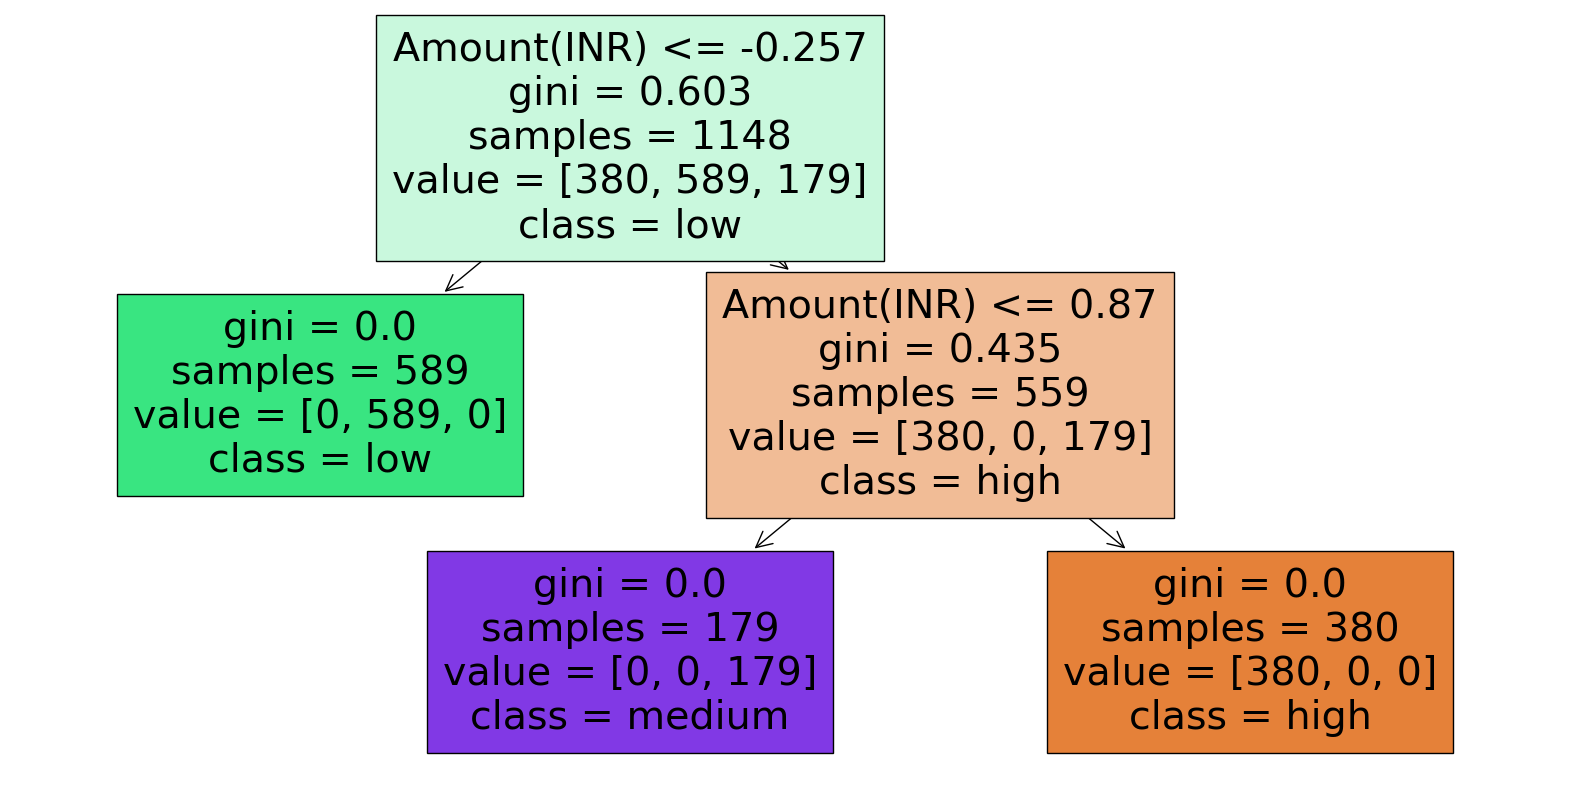

In [272]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=le.classes_,  filled=True)

In [273]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, dt_pred)
accuracy

1.0

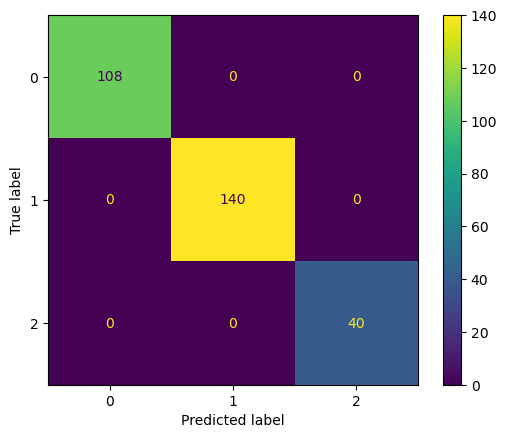

In [274]:
confusion = confusion_matrix(y_test, dt_pred)
cm = ConfusionMatrixDisplay(confusion)
cm.plot()